# Analysis of Canadian Housing market

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset

**TODO** - add some explanation here

In [2]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Let's begin by downloading the data, and listing the files within the dataset.

In [173]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/lameesmohammad/home-prices-in-canada'

In [174]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./home-prices-in-canada" (use force=True to force download)


The dataset has been downloaded and extracted.

In [175]:
# Change this
data_dir = './home-prices-in-canada'

In [176]:
import os
os.listdir(data_dir)

['Average home prices in Canadian provinces.csv',
 'Average home prices in major Canadian cities.csv']

Let us save and upload our work to Jovian before continuing.

In [78]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [177]:
import pandas as pd
import numpy as np

In [178]:
province_data = pd.read_csv(data_dir + '/Average home prices in Canadian provinces.csv')
city_data = pd.read_csv(data_dir + '/Average home prices in major Canadian cities.csv')

In [179]:
province_data.info()
province_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                13 non-null     object 
 1   Price Januray 2022  13 non-null     float64
 2   Price Januray 2021  13 non-null     float64
 3   y/y % change        13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 544.0+ bytes


,Area,Price Januray 2022,Price Januray 2021,y/y % change
0,Canada,748439.0,618587.0,21.0
1,British Columbia,1040888.0,843918.0,23.3
2,Alberta,443398.0,403261.0,10.0
3,Manitoba,338772.0,304759.0,11.2
4,Saskatchewan,285700.0,267100.0,7.0


In [180]:
city_data.info()
city_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Major City       17 non-null     object
 1   Province         17 non-null     object
 2   Price 2021-2022  17 non-null     int64 
 3   Population       17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 672.0+ bytes


,Major City,Province,Price 2021-2022,Population
0,Toronto,Ontario,1210889,2930000
1,Ottawa,Ontario,752442,994837
2,Hamilton,Ontario,976423,579200
3,Montreal,Quebec,583295,1780000
4,Edmonton,Alberta,493543,981280


## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [211]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 1.0, 'Housing price of Canada 2021 v/s 2022')

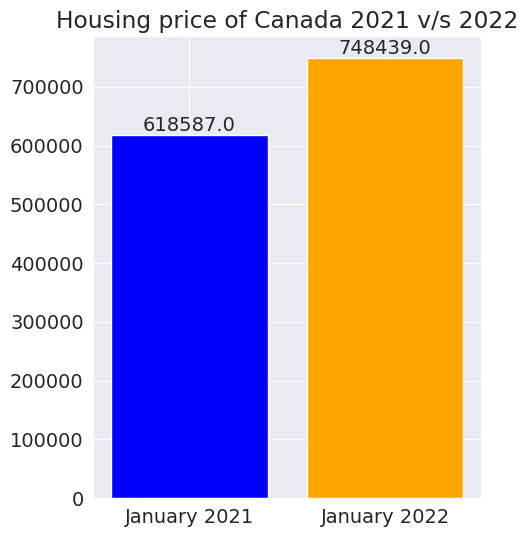

In [123]:
plt.figure(figsize=(5, 6))
plt.bar(['January 2021', 'January 2022'], [province_data['Price Januray 2021'][0], province_data['Price Januray 2022'][0]], color = ['blue','orange'])
plt.text(0,province_data['Price Januray 2021'][0] ,str(province_data['Price Januray 2021'][0]), ha='center', va='bottom')
plt.text(1,province_data['Price Januray 2022'][0] ,str(province_data['Price Januray 2022'][0]), ha='center', va='bottom')
plt.title("Housing price of Canada 2021 v/s 2022")

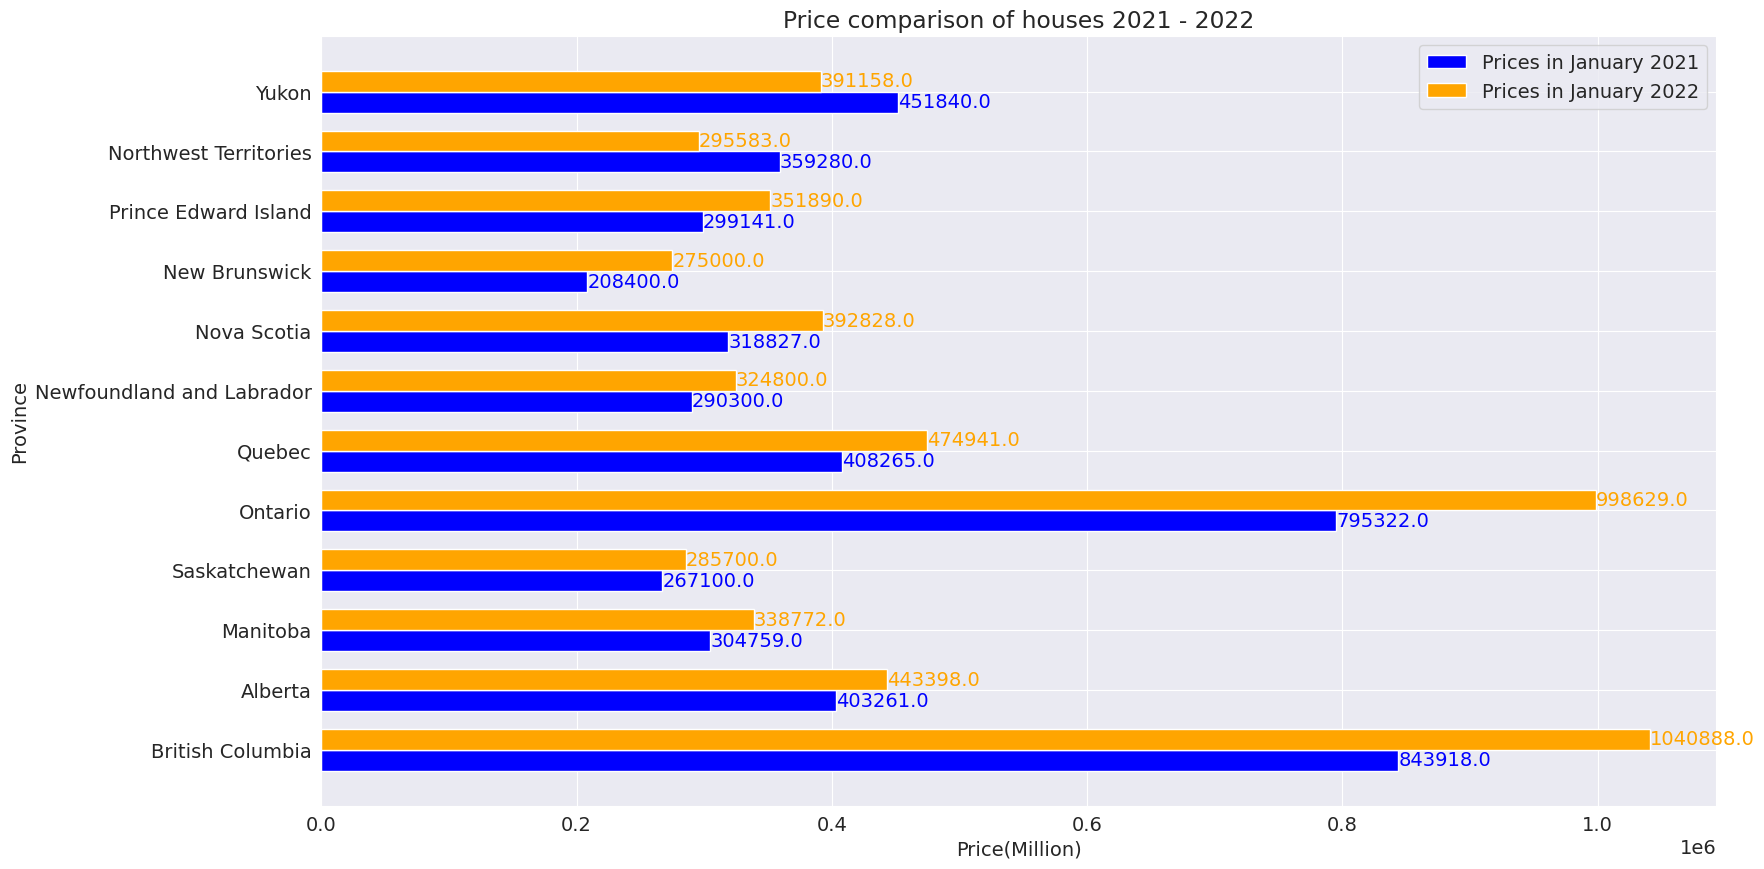

In [130]:
bar_width = 0.35
x = np.arange(len(province_data['Area'][1:]))

fig, ax = plt.subplots(figsize=(18, 10))

bar1 = ax.barh(x - bar_width/2, province_data['Price Januray 2021'][1:], bar_width, label='Prices in January 2021', color='blue')

bar2 = ax.barh(x + bar_width/2, province_data['Price Januray 2022'][1:], bar_width, label='Prices in January 2022', color='orange')

ax.set_ylabel('Province')
ax.set_xlabel('Price(Million)')
ax.set_title('Price comparison of houses 2021 - 2022')
ax.set_yticks(x)
ax.set_yticklabels(province_data['Area'][1:])
ax.legend()

for i, val in enumerate(province_data['Price Januray 2021'][1:]):
    ax.text(val + 10, i - bar_width/2, str(val), ha='left', va='center', color='blue')

for i, val in enumerate(province_data['Price Januray 2022'][1:]):
    ax.text(val + 10, i + bar_width/2, str(val), ha='left', va='center', color='orange')

plt.show()

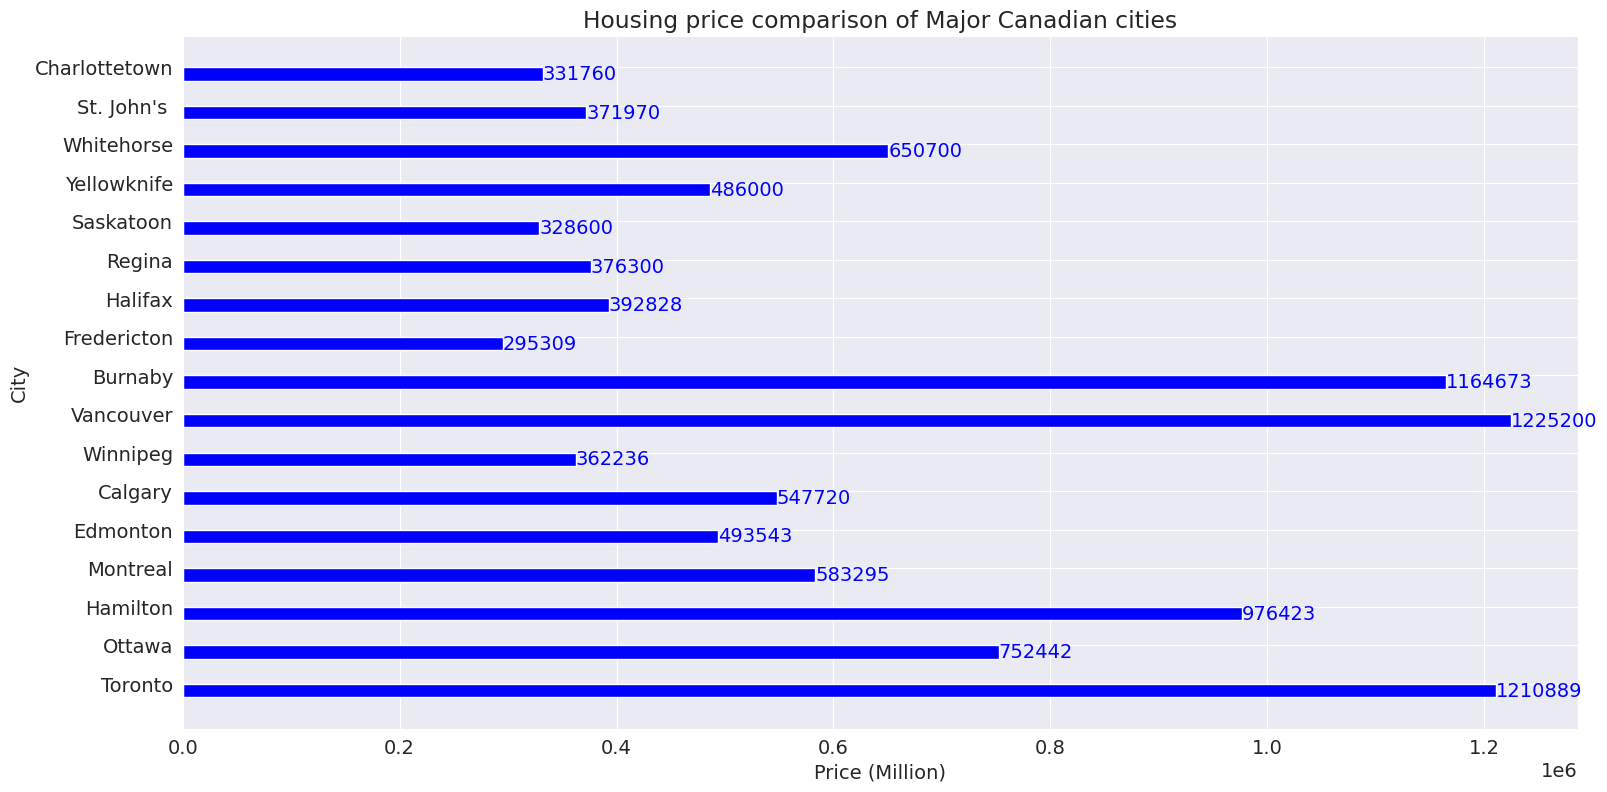

In [131]:
bar_width = 0.35
x = np.arange(len(city_data['Major City']))

fig, ax = plt.subplots(figsize=(18, 9))

bar1 = ax.barh(x - bar_width/2, city_data['Price 2021-2022'], bar_width, color='blue')

ax.set_ylabel('City')
ax.set_xlabel('Price (Million)')
ax.set_title('Housing price comparison of Major Canadian cities')
ax.set_yticks(x)
ax.set_yticklabels(city_data['Major City'])

for i, val in enumerate(city_data['Price 2021-2022']):
    ax.text(val + 10, i - bar_width/2, str(val), ha='left', va='center', color='blue')

plt.show()

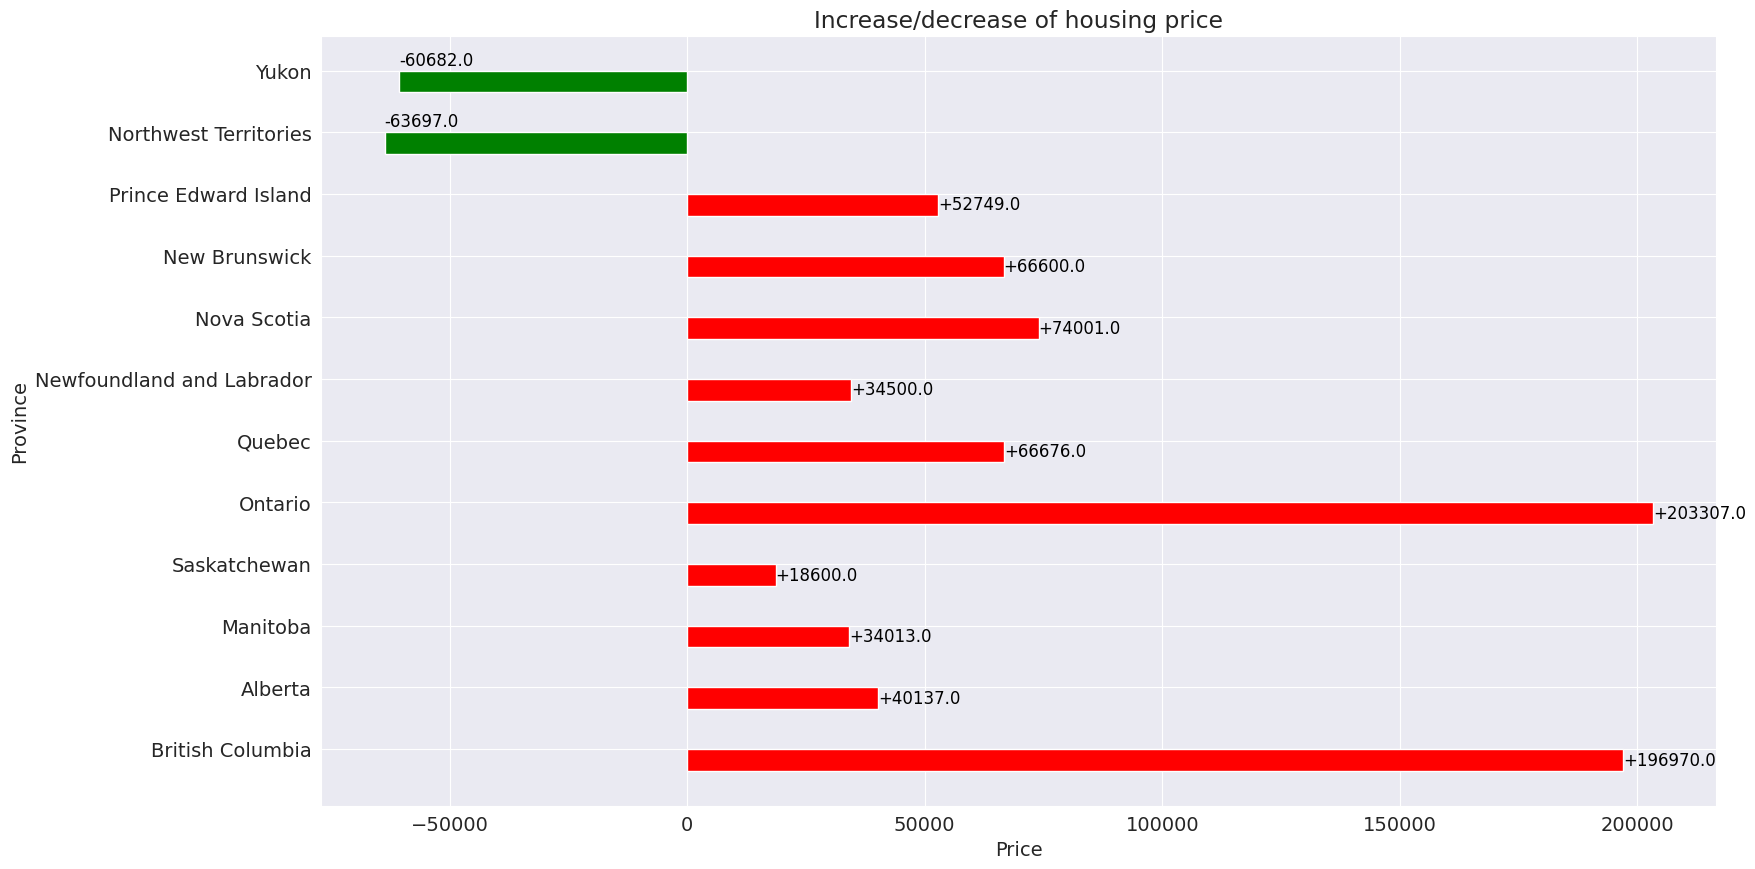

In [160]:
bar_width = 0.35
x = np.arange(len(province_data['Area'][1:]))

price_difference = province_data['Price Januray 2022'][1:] - province_data['Price Januray 2021'][1:]

colors = ['red' if diff > 0 else 'green' for diff in price_difference]

fig, ax = plt.subplots(figsize=(18, 10))

bar1 = ax.barh(x - bar_width/2, price_difference, bar_width, color=colors)

ax.set_ylabel('Province')
ax.set_xlabel('Price')
ax.set_title('Increase/decrease of housing price')
ax.set_yticks(x)
ax.set_yticklabels(province_data['Area'][1:])

for i, val in enumerate(price_difference):
    if val >= 0:
        ax.text(val, i - bar_width/2, f'+{val:}', va='center', color='black', fontsize=12)
    else:
        ax.text(val, i + bar_width/2, f'{val:}', va='center', color='black', fontsize=12)

plt.show()

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: What is the most expensive major city and does the most expensive major city is in the most expensive provine ?


In [205]:
exp_city = city_data['Price 2021-2022'].max()
data_exp_city = city_data[city_data['Price 2021-2022'] == exp_city].index
print("The most expensive major city is %s having average house price $ %d"% (city_data.loc[data_exp_city[0]]['Major City'], city_data.loc[data_exp_city[0]]['Price 2021-2022']))

exp_prov = province_data['Price Januray 2022'].max()
data_exp_prov = province_data[province_data['Price Januray 2022'] == exp_prov].index
print("The most expensive province is %s having average house price $ %d"% (province_data.loc[data_exp_prov[0]]['Area'], province_data.loc[data_exp_prov[0]]['Price Januray 2022']))

if city_data.loc[data_exp_city[0]]['Province'] == province_data.loc[data_exp_prov[0]]['Area']:
  print("Yes, the most expensive city,%s, is in the most expensive province,%s." %(city_data.loc[data_exp_city[0]]['Major City'],province_data.loc[data_exp_prov[0]]['Area']))
else :
  print("No, the most expensive city,%s, is not in the most expensive province,%s." %(city_data.loc[data_exp_city[0]]['Major City'],province_data.loc[data_exp_prov[0]]['Area']))


The most expensive major city is Vancouver having average house price $ 1225200
The most expensive province is British Columbia having average house price $ 1040888
Yes, the most expensive city,Vancouver, is in the most expensive province,British Columbia.


#### Q2: What is the precentage increase/decrease in prices of housing ?

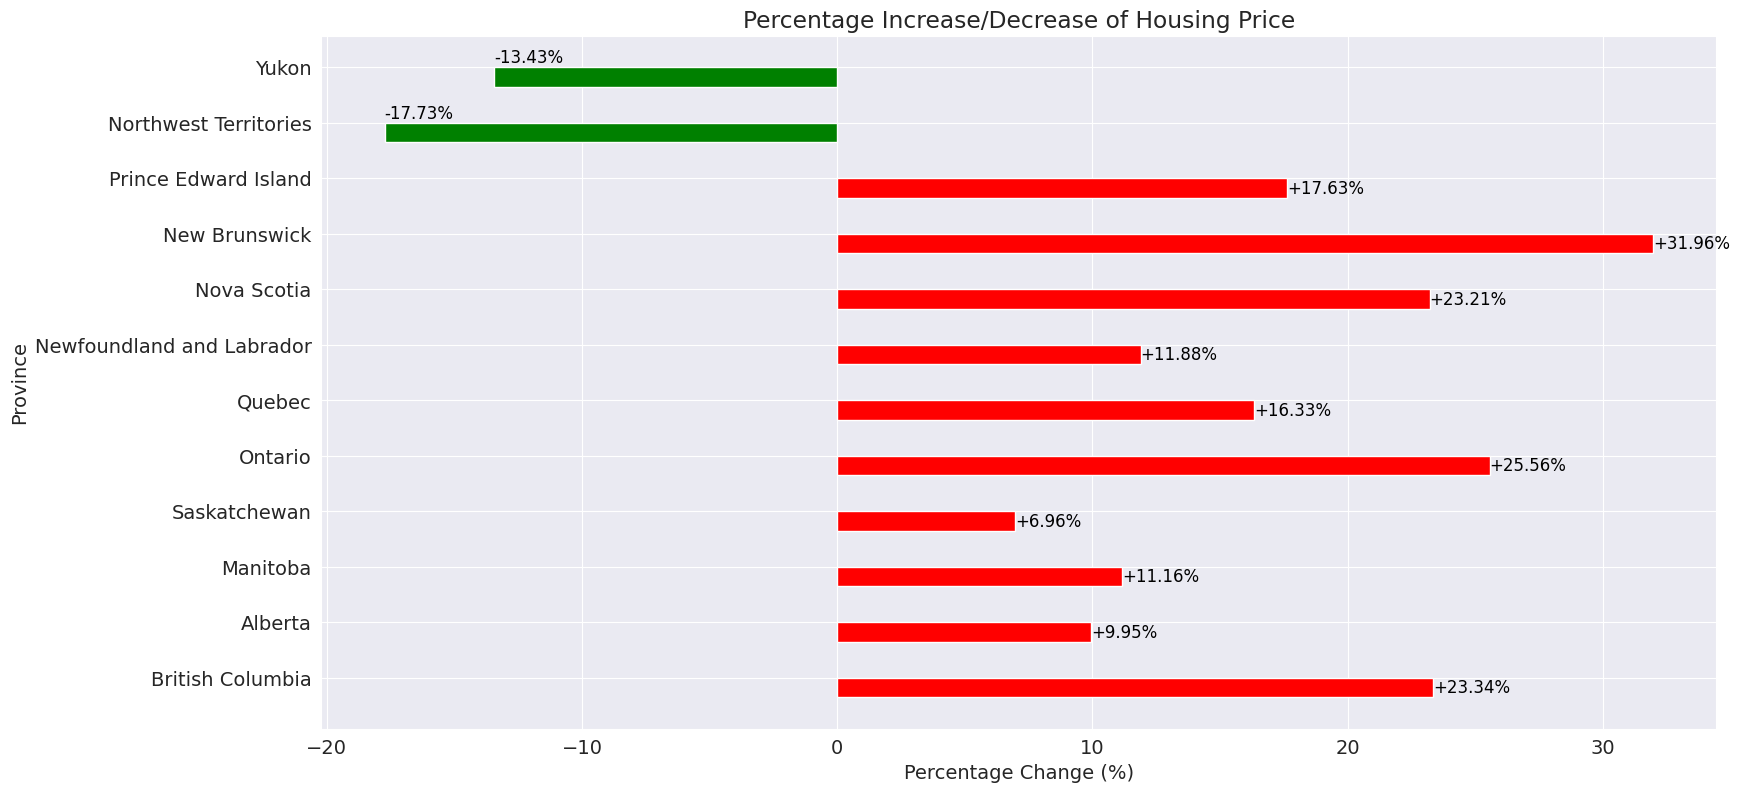

In [210]:
bar_width = 0.35
x = np.arange(len(province_data['Area'][1:]))

percentage_change = ((province_data['Price Januray 2022'][1:] - province_data['Price Januray 2021'][1:]) / province_data['Price Januray 2021'][1:]) * 100

colors = ['red' if pct > 0 else 'green' for pct in percentage_change]

fig, ax = plt.subplots(figsize=(18, 9))

bar1 = ax.barh(x - bar_width/2, percentage_change, bar_width, color=colors)

ax.set_ylabel('Province')
ax.set_xlabel('Percentage Change (%)')
ax.set_title('Percentage Increase/Decrease of Housing Price')
ax.set_yticks(x)
ax.set_yticklabels(province_data['Area'][1:])

for i, val in enumerate(percentage_change):
    if val >= 0:
        ax.text(val, i - bar_width/2, f'+{val:.2f}%', va='center', color='black', fontsize=12)
    else:
        ax.text(val, i + bar_width/2, f'{val:.2f}%', va='center', color='black', fontsize=12)

plt.show()

#### Q2: Is there a co-relation between pupulation and housing prices ?

In [214]:
correlation_coefficient = city_data["Price 2021-2022"].corr(city_data["Population"])
print(correlation_coefficient)

0.4546442938925804


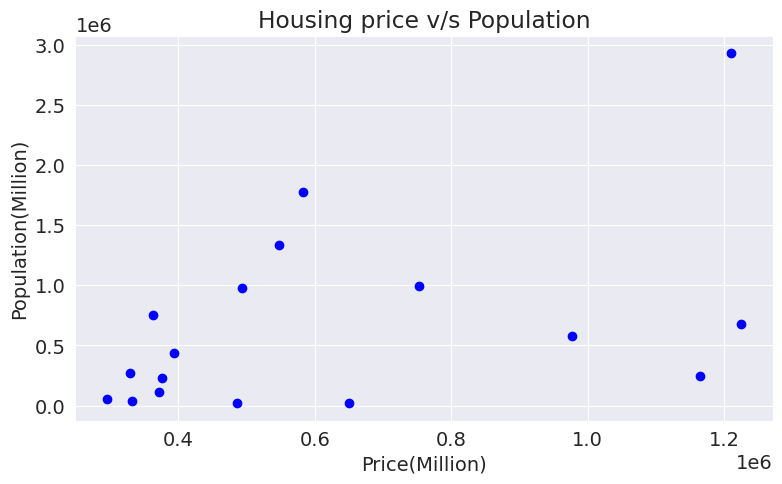

In [217]:
plt.scatter(city_data['Price 2021-2022'], city_data['Population'],color='blue')
plt.title("Housing price v/s Population")
plt.xlabel("Price(Million)")
plt.ylabel("Population(Million)")
plt.show()